In [176]:
import numpy as np
import tensorflow as tf


class ContextualBandit:
    def __init__(self, num_actions, state_dim):
        self.num_actions = num_actions
        self.state_dim = state_dim
        self.model = self._build_model()

    def _build_model(self):
        model = tf.keras.models.Sequential(
            [
                tf.keras.layers.Dense(
                    32, activation="relu", input_shape=(self.state_dim,)
                ),
                tf.keras.layers.Dense(1),
            ]
        )
        model.compile(optimizer="adam", loss="mse")
        return model

    def get_action(self, state):
        state = state.reshape(1, -1)
        action_value = self.model.predict(state, verbose=0)
        return action_value[0]

    def train(self, states, action_values):
        X = states.reshape(1, -1)
        y = action_values.reshape(1, -1)
        self.model.fit(X, y, epochs=1, verbose=0)

In [179]:
import importlib

import bandit.environment as env

importlib.reload(env)

<module 'bandit.environment' from '/Users/alextanhongpin/Documents/python/python-bandit/bandit/environment.py'>

In [183]:
total_reward = 0
avg_rewards = []


n_actions = len(env.actions)
bandit = ContextualBandit(num_actions=n_actions, state_dim=100)

for i, ctx in env.random_context(100):
    action_values = [
        bandit.get_action(env.preprocess(ctx, action)) for action in env.actions
    ]
    best_action = np.argmax(action_values)
    action = env.actions[best_action]
    reward = env.get_cost(ctx, action)

    states = env.preprocess(ctx, action)
    bandit.train(states, np.array(reward))
    total_reward += np.maximum(reward, 0)
    avg_rewards.append(total_reward / (i + 1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.75it/s]


<Axes: >

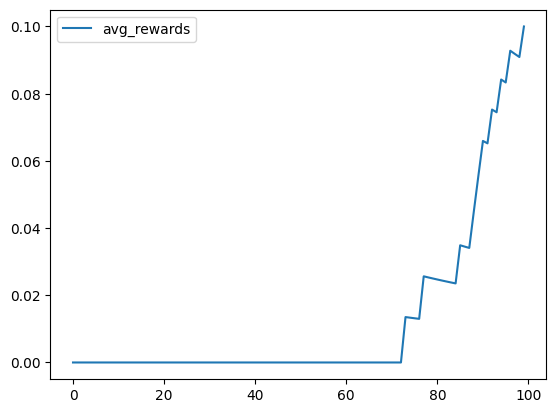

In [184]:
import pandas as pd

pd.DataFrame({"avg_rewards": avg_rewards}).plot()

In [186]:
total_reward

10.0